# Testing the API

In [159]:
import requests

In [160]:
response = requests.get('http://statsapi.mlb.com/api/v1/schedule/games/?sportId=1&startDate=2019-03-28&endDate=2019-09-29')

In [161]:
data = response.json()

In [162]:
data

{'copyright': 'Copyright 2023 MLB Advanced Media, L.P.  Use of any content on this page acknowledges agreement to the terms posted here http://gdx.mlb.com/components/copyright.txt',
 'totalItems': 2471,
 'totalEvents': 0,
 'totalGames': 2471,
 'totalGamesInProgress': 0,
 'dates': [{'date': '2019-03-28',
   'totalItems': 15,
   'totalEvents': 0,
   'totalGames': 15,
   'totalGamesInProgress': 0,
   'games': [{'gamePk': 565895,
     'link': '/api/v1.1/game/565895/feed/live',
     'gameType': 'R',
     'season': '2019',
     'gameDate': '2019-03-28T17:05:00Z',
     'officialDate': '2019-03-28',
     'status': {'abstractGameState': 'Final',
      'codedGameState': 'F',
      'detailedState': 'Final',
      'statusCode': 'F',
      'startTimeTBD': False,
      'abstractGameCode': 'F'},
     'teams': {'away': {'leagueRecord': {'wins': 1,
        'losses': 0,
        'pct': '1.000'},
       'score': 2,
       'team': {'id': 121,
        'name': 'New York Mets',
        'link': '/api/v1/teams/

In [164]:
game = requests.get(f"http://statsapi.mlb.com{data['dates'][0]['games'][0]['link']}")

In [165]:
games_json = game.json()

In [166]:
teams = games_json['gameData']
teams

{'game': {'pk': 565895,
  'type': 'R',
  'doubleHeader': 'N',
  'id': '2019/03/28/nynmlb-wasmlb-1',
  'gamedayType': 'P',
  'tiebreaker': 'N',
  'gameNumber': 1,
  'calendarEventID': '14-565895-2019-03-28',
  'season': '2019',
  'seasonDisplay': '2019'},
 'datetime': {'dateTime': '2019-03-28T17:05:00Z',
  'originalDate': '2019-03-28',
  'officialDate': '2019-03-28',
  'dayNight': 'day',
  'time': '1:05',
  'ampm': 'PM'},
 'status': {'abstractGameState': 'Final',
  'codedGameState': 'F',
  'detailedState': 'Final',
  'statusCode': 'F',
  'startTimeTBD': False,
  'abstractGameCode': 'F'},
 'teams': {'away': {'springLeague': {'id': 115,
    'name': 'Grapefruit League',
    'link': '/api/v1/league/115',
    'abbreviation': 'GL'},
   'allStarStatus': 'N',
   'id': 121,
   'name': 'New York Mets',
   'link': '/api/v1/teams/121',
   'season': 2019,
   'venue': {'id': 3289, 'name': 'Citi Field', 'link': '/api/v1/venues/3289'},
   'springVenue': {'id': 2856, 'link': '/api/v1/venues/2856'},
   '

In [169]:
teamlist = []
teamlist.append(teams['teams']['away']['name'])
teamlist.append(teams['teams']['home']['name'])
teamlist

['New York Mets', 'Washington Nationals']

In [170]:
#game_ids = []
#for 

game_id = games_json['gameData']['game']['id']

In [171]:
game_id = 565895
game_info = requests.get(f"http://statsapi.mlb.com/api/v1/game/{game_id}/content")

In [172]:

json_info = game_info.json()

In [173]:
json_info

{'copyright': 'Copyright 2023 MLB Advanced Media, L.P.  Use of any content on this page acknowledges agreement to the terms posted here http://gdx.mlb.com/components/copyright.txt',
 'link': '/api/v1/game/565895/content',
 'editorial': {'preview': {},
  'articles': None,
  'recap': {'mlb': {'type': 'article',
    'state': 'A',
    'date': '2019-03-28T22:40:00Z',
    'headline': "Cano's impressive debut carries Mets past Nats",
    'seoTitle': "Robinson Cano homers in Mets' Opening Day win",
    'slug': 'robinson-cano-homers-on-opening-day',
    'blurb': 'WASHINGTON -- Robinson Canó set his trap with an air of innocence, stepping casually over to second base. Cano knew from the moment Anthony Rendon hit a ground ball to third that completing a double play would be difficult, perhaps impossible. He also knew, with a one-run lead of his',
    'keywordsAll': [{'type': 'season',
      'value': 'season-2019',
      'displayName': 'Season 2019'},
     {'value': 'storytype-article', 'displayNa

In [174]:
json_info.keys()

dict_keys(['copyright', 'link', 'editorial', 'media', 'highlights', 'summary', 'gameNotes'])

# Questions

Who played the bottom 3 teams most often?
Who played the top 3 teams most often?
Does it seem that these teams' records were affected by this?

In [175]:
#Create edges between teams for each game

%matplotlib inline
import json
import random

import numpy as np
import pandas as pd
import networkx as nx

In [176]:
g = nx.Graph() # Build the graph

In [177]:

#Parse each game, grab teams as team1 and team2, and add weighted edge
# for dates, games, link, 

response = requests.get('http://statsapi.mlb.com/api/v1/schedule/games/?sportId=1&startDate=2019-03-28&endDate=2019-09-29')
season = response.json()

In [178]:
dates = season['dates']

In [179]:
date = dates[0]
game = date['games'][0]
teams = game['teams']
teams

{'away': {'leagueRecord': {'wins': 1, 'losses': 0, 'pct': '1.000'},
  'score': 2,
  'team': {'id': 121, 'name': 'New York Mets', 'link': '/api/v1/teams/121'},
  'isWinner': True,
  'splitSquad': False,
  'seriesNumber': 1},
 'home': {'leagueRecord': {'wins': 0, 'losses': 1, 'pct': '.000'},
  'score': 0,
  'team': {'id': 120,
   'name': 'Washington Nationals',
   'link': '/api/v1/teams/120'},
  'isWinner': False,
  'splitSquad': False,
  'seriesNumber': 1}}

In [180]:
#create list of lists of teams for each game
team_id_dict = {}
all_games = []
for i in dates:
    games = i['games']
    for game in games:
        #id = j['gamePk']
        #response = requests.get(f"http://statsapi.mlb.com/api/v1/game/{id}/content")
        #game = response.json()
        #print(game)
        teamlist = []
        teams = game['teams']
        teamlist.append(teams['away']['team']['name'])
        teamlist.append(teams['home']['team']['name'])
        all_games.append(teamlist)
        if teams['away']['team']['name'] in team_id_dict:
            pass
        else:
            team_id_dict[teams['away']['team']['name']] = teams['away']['team']['id']
        #print(teamlist)

len(all_games)
        

2471

In [181]:
"""
    for line in in_file:
        
        # Load the movie from this line
        this_movie = json.loads(line)
            
        # Create a node for every actor
        for actor_id,actor_name in this_movie['actors']:
            # Instead of passing, add the actor to the graph
            g.add_node(actor_id, name=actor_name)
            #pass
            
        # Iterate through the list of actors, generating all pairs
        #. Starting with the first actor in the list, generate pairs with all subsequent actors
        #. then continue to second actor in the list and repeat
        i = 0 # Counter in the list
        for left_actor_id,left_actor_name in this_movie['actors']:
            for right_actor_id,right_actor_name in this_movie['actors'][i+1:]:
                
                # Get the current weight, if it exists
                w = g.get_edge_data(left_actor_id,right_actor_id, default= {'weight':0})['weight']
                
                # Add an edge for these actors
                g.add_edge(left_actor_id, right_actor_id, weight = w+1)
                
                # Print edges
                #print(left_actor_name, "<->", right_actor_name)
                
            i += 1 # increment the counter
         
        
        #break
"""
print('')

In [182]:
for game in all_games:
    #print(game)
    for team in game:
        #print(team)
        g.add_node(team)
        
    i=0
    for away in game:
        #print("away:", away)
        for home in game[i+1:]:
            
            w = g.get_edge_data(away,home, default= {'weight':0})['weight']
            
            g.add_edge(away, home, weight=w+1)
            
            print(away, "<->", home)
            
        i+=1
        
    #break

New York Mets <-> Washington Nationals
Baltimore Orioles <-> New York Yankees
St. Louis Cardinals <-> Milwaukee Brewers
Atlanta Braves <-> Philadelphia Phillies
Detroit Tigers <-> Toronto Blue Jays
Houston Astros <-> Tampa Bay Rays
Chicago Cubs <-> Texas Rangers
Los Angeles Angels <-> Oakland Athletics
Arizona Diamondbacks <-> Los Angeles Dodgers
Pittsburgh Pirates <-> Cincinnati Reds
San Francisco Giants <-> San Diego Padres
Cleveland Indians <-> Minnesota Twins
Colorado Rockies <-> Miami Marlins
Chicago White Sox <-> Kansas City Royals
Boston Red Sox <-> Seattle Mariners
Detroit Tigers <-> Toronto Blue Jays
Houston Astros <-> Tampa Bay Rays
Colorado Rockies <-> Miami Marlins
St. Louis Cardinals <-> Milwaukee Brewers
Los Angeles Angels <-> Oakland Athletics
Arizona Diamondbacks <-> Los Angeles Dodgers
Boston Red Sox <-> Seattle Mariners
San Francisco Giants <-> San Diego Padres
New York Mets <-> Washington Nationals
Baltimore Orioles <-> New York Yankees
Cleveland Indians <-> Minnesot

In [183]:
print(g.nodes)

['New York Mets', 'Washington Nationals', 'Baltimore Orioles', 'New York Yankees', 'St. Louis Cardinals', 'Milwaukee Brewers', 'Atlanta Braves', 'Philadelphia Phillies', 'Detroit Tigers', 'Toronto Blue Jays', 'Houston Astros', 'Tampa Bay Rays', 'Chicago Cubs', 'Texas Rangers', 'Los Angeles Angels', 'Oakland Athletics', 'Arizona Diamondbacks', 'Los Angeles Dodgers', 'Pittsburgh Pirates', 'Cincinnati Reds', 'San Francisco Giants', 'San Diego Padres', 'Cleveland Indians', 'Minnesota Twins', 'Colorado Rockies', 'Miami Marlins', 'Chicago White Sox', 'Kansas City Royals', 'Boston Red Sox', 'Seattle Mariners', 'National League All-Stars', 'American League All-Stars']


In [184]:
g.remove_node('American League All-Stars')
g.remove_node('National League All-Stars')

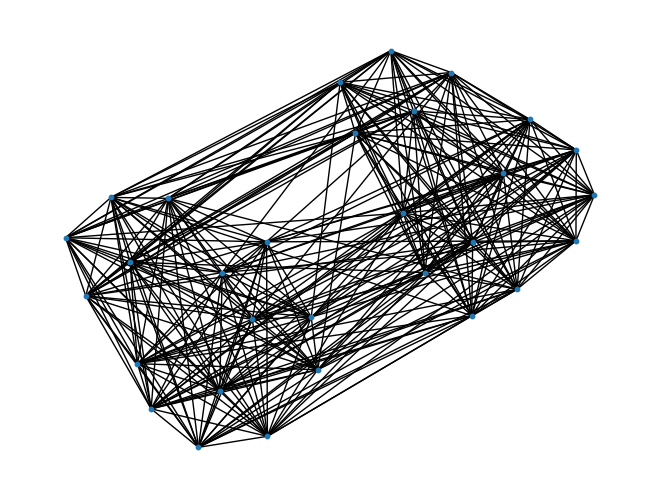

In [185]:
pos = nx.spring_layout(g, k=1)

nx.draw(g, pos, node_size=10, with_labels=False)

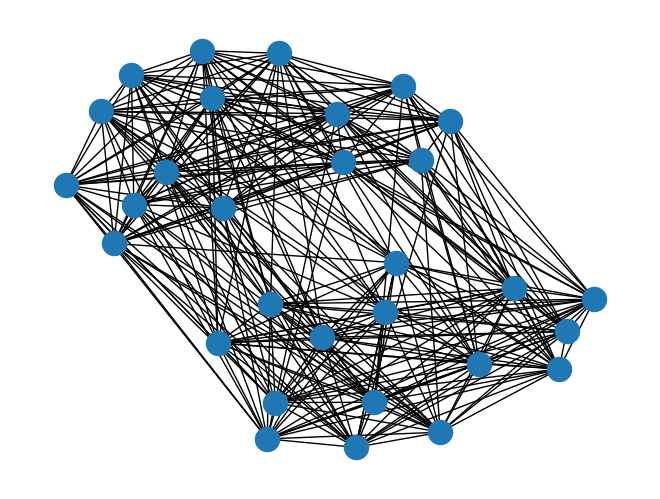

In [186]:
tigers = nx.ego_graph(g, "Detroit Tigers", radius=3, undirected=True)
nx.draw(tigers)


In [187]:
t_edge_dict = {}
tiger_edges = tigers.edges('Detroit Tigers')
for i in tiger_edges:
    t_edge_dict[i[1]] = (g.get_edge_data(i[0],i[1], default= {'weight':0})['weight'])
t_edge_dict


{'New York Mets': 3,
 'Washington Nationals': 3,
 'Baltimore Orioles': 7,
 'New York Yankees': 7,
 'Atlanta Braves': 3,
 'Philadelphia Phillies': 4,
 'Toronto Blue Jays': 7,
 'Kansas City Royals': 19,
 'Cleveland Indians': 19,
 'Minnesota Twins': 20,
 'Pittsburgh Pirates': 4,
 'Chicago White Sox': 23,
 'Boston Red Sox': 8,
 'Los Angeles Angels': 6,
 'Houston Astros': 7,
 'Oakland Athletics': 8,
 'Miami Marlins': 3,
 'Tampa Bay Rays': 6,
 'Texas Rangers': 6,
 'Seattle Mariners': 7}

In [188]:
astros = nx.ego_graph(g,'Houston Astros', radius=3, undirected=True)

In [189]:
a_edge_dict = {}
astros_edges = astros.edges('Houston Astros')
for i in astros_edges:
    a_edge_dict[i[1]] = (g.get_edge_data(i[0],i[1], default= {'weight':0})['weight'])
a_edge_dict

{'Baltimore Orioles': 6,
 'New York Yankees': 7,
 'St. Louis Cardinals': 3,
 'Milwaukee Brewers': 4,
 'Detroit Tigers': 7,
 'Toronto Blue Jays': 6,
 'Tampa Bay Rays': 7,
 'Texas Rangers': 19,
 'Oakland Athletics': 19,
 'Seattle Mariners': 19,
 'Minnesota Twins': 7,
 'Cleveland Indians': 7,
 'Los Angeles Angels': 19,
 'Kansas City Royals': 6,
 'Boston Red Sox': 6,
 'Chicago White Sox': 8,
 'Chicago Cubs': 3,
 'Cincinnati Reds': 3,
 'Pittsburgh Pirates': 3,
 'Colorado Rockies': 4}

In [231]:
#https://www.google.com/search?q=2019+mlb+standings&rlz=1C5CHFA_enUS864US864&oq=2019+MLB+standings&aqs=chrome.0.0i512j0i22i30l9.6773j0j7&sourceid=chrome&ie=UTF-8#sie=lg;/g/11fd6dgw5r;4;/m/09p14;st;fp;1;;;
#Graph of win percentage against connection with Tigers
#Order the edges by weight
sorted_by_weight = sorted(t_edge_dict.items(), key=lambda x:x[1])
tiger_dict = dict(sorted_by_weight)

teams = list(tiger_dict.keys())
weights = list(tiger_dict.values())

tiger_dict

{'New York Mets': 3,
 'Washington Nationals': 3,
 'Atlanta Braves': 3,
 'Miami Marlins': 3,
 'Philadelphia Phillies': 4,
 'Pittsburgh Pirates': 4,
 'Los Angeles Angels': 6,
 'Tampa Bay Rays': 6,
 'Texas Rangers': 6,
 'Baltimore Orioles': 7,
 'New York Yankees': 7,
 'Toronto Blue Jays': 7,
 'Houston Astros': 7,
 'Seattle Mariners': 7,
 'Boston Red Sox': 8,
 'Oakland Athletics': 8,
 'Kansas City Royals': 19,
 'Cleveland Indians': 19,
 'Minnesota Twins': 20,
 'Chicago White Sox': 23}

In [232]:
#Graph of win percentage against connection with Tigers
#Order the edges by weight
sorted_by_weight = sorted(a_edge_dict.items(), key=lambda x:x[1])
astros_dict = dict(sorted_by_weight)

teams = list(astros_dict.keys())
weights = list(astros_dict.values())

astros_dict

{'St. Louis Cardinals': 3,
 'Chicago Cubs': 3,
 'Cincinnati Reds': 3,
 'Pittsburgh Pirates': 3,
 'Milwaukee Brewers': 4,
 'Colorado Rockies': 4,
 'Baltimore Orioles': 6,
 'Toronto Blue Jays': 6,
 'Kansas City Royals': 6,
 'Boston Red Sox': 6,
 'New York Yankees': 7,
 'Detroit Tigers': 7,
 'Tampa Bay Rays': 7,
 'Minnesota Twins': 7,
 'Cleveland Indians': 7,
 'Chicago White Sox': 8,
 'Texas Rangers': 19,
 'Oakland Athletics': 19,
 'Seattle Mariners': 19,
 'Los Angeles Angels': 19}

In [235]:
ttop4 = dict(list(tiger_dict.items())[-4:])
atop4 = dict(list(astros_dict.items())[-4:])


In [238]:
#team_id_dict


In [239]:
for i in list(team_id_dict.keys()):
    id = team_id_dict[i]
    response = requests.get(f"http://statsapi.mlb.com/api/v1/teams/{id}")
    j = response.json()


In [195]:
j['teams'][0].keys()

dict_keys(['allStarStatus', 'id', 'name', 'link', 'season', 'venue', 'teamCode', 'fileCode', 'abbreviation', 'teamName', 'locationName', 'firstYearOfPlay', 'league', 'sport', 'shortName', 'franchiseName', 'clubName', 'active'])

In [240]:
# try to get win pcts from only final date of season
win_pct_dict = {}
for i in data['dates']:
    if i['date'] == '2019-09-29':
        #print(i)
        for j in i['games']:
            #print(j['teams']['away']['team']['name'])
            win_pct_dict[j['teams']['away']['team']['name']] = j['teams']['away']['leagueRecord']['pct']
            win_pct_dict[j['teams']['home']['team']['name']] = j['teams']['home']['leagueRecord']['pct']
    else:
        pass
    
#win_pct_dict


In [248]:
#Create a dictionary for win pct of only top 4 for each team

#Tigers
tpct = {}
for i in tiger_dict:
    for j in win_pct_dict:
        if i == j:
            tpct[i] = win_pct_dict[i]
            
tpct




{'New York Mets': '.531',
 'Washington Nationals': '.574',
 'Atlanta Braves': '.599',
 'Miami Marlins': '.352',
 'Philadelphia Phillies': '.500',
 'Pittsburgh Pirates': '.426',
 'Los Angeles Angels': '.444',
 'Tampa Bay Rays': '.593',
 'Texas Rangers': '.481',
 'Baltimore Orioles': '.333',
 'New York Yankees': '.636',
 'Toronto Blue Jays': '.414',
 'Houston Astros': '.660',
 'Seattle Mariners': '.420',
 'Boston Red Sox': '.519',
 'Oakland Athletics': '.599',
 'Kansas City Royals': '.364',
 'Cleveland Indians': '.574',
 'Minnesota Twins': '.623',
 'Chicago White Sox': '.447'}